In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/MyDrive/CSE-498/Adversarial_Learning
!ls
!nvidia-smi

/content/gdrive/MyDrive/CSE-498/Adversarial_Learning
attacking_main.py  datasets		   Middle_Results  README.md
base_model.py	   experiment_operator.py  model_weights   run_code.ipynb
data_process.py    learning_main.py	   __pycache__
Sun Mar 21 08:55:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    23W / 300W |      0MiB / 16160MiB |      0%      Default |
|             

In [ ]:
!python attacking_teset.py 1 1 -l 1e-1 -n 1 -b 1 -p 

Loading cifar10 to the memory...
Initialize ResNet18...
tcmalloc: large alloc 1228800000 bytes == 0x563971c06000 @  0x7ff8602c51e7 0x7ff80c11b46e 0x7ff80c16bc7b 0x7ff80c16bebe 0x7ff80c204887 0x56395a04f050 0x56395a14099d 0x56395a0c2fe9 0x56395a05069a 0x56395a0bec9e 0x56395a0bdb0e 0x56395a0bd813 0x56395a187592 0x56395a18790d 0x56395a1877b6 0x56395a15f103 0x56395a15edac 0x7ff85f0afbf7 0x56395a15ec8a
tcmalloc: large alloc 1228800000 bytes == 0x563971c06000 @  0x7ff8602c51e7 0x7ff80c11b46e 0x7ff80c16bc7b 0x7ff80c16bebe 0x7ff80c204887 0x56395a04f050 0x56395a14099d 0x56395a0c2fe9 0x56395a05069a 0x56395a0bec9e 0x56395a0bdb0e 0x56395a0bd813 0x56395a187592 0x56395a18790d 0x56395a1877b6 0x56395a15f103 0x56395a15edac 0x7ff85f0afbf7 0x56395a15ec8a
Loading learned parameters...
Print model's performance: training_accuracy = 0.9986, testing_accuracy = 0.9058
                           training_loss = 0.005683, testing_loss = 0.600583
0.8181
0.7431
0.7258
0.7213
0.7211


Loading cifar10 to the memory...
Initialize ResNet18...
The chosen picture's idx and class are as below:
6
frog
Visualize this picture:


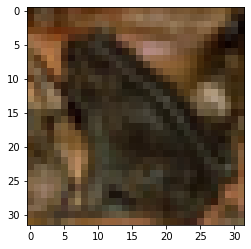

Loading learned parameters...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Print model's performance: training_accuracy = 0.9988, testing_accuracy = 0.9058
                           training_loss = 0.000056, testing_loss = 0.006006
Prediction before attack:
True class probability: 1.0
Predictive class: 6
Start attacking...
After perturbation:
True class probability: 8.883269401849248e-06
Predictive class: 3
Highest class probability: 0.9999819993972778
Visualization of sign(gradient):


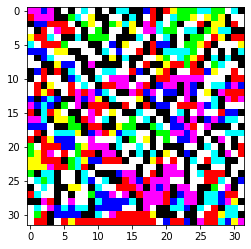

Visualization of perturbed sample:


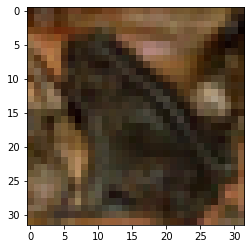

In [12]:
# 226 426 912 1034
# model dataset --lr --norm --batch_size --sample --pgd(action="store_true") --target 
%run attacking_main.py 1 1 -l 1e-1 -n 1 -b 100 -s 30

In [ ]:
!python learning_main.py --help

usage: learning_main.py [-h] [-l LR] [-n NORM] [-b BATCH_SIZE] [-i ITERATIONS]
                        [-s SCHEDULE_INTERVALS [SCHEDULE_INTERVALS ...]]
                        {0,1} {0,1}

This is the main training program.
Firstly, You can specify the dataset and network for the learning process.
Secondly, You can also set hyper-parameters for your model training.
More details can be seen from the introduction of arguments below .

positional arguments:
  {0,1}                 specify a deep learning model (1 as default)
                        0: LeNet (a CNN with two conv layers)
                        1: ResNet18 (change the first conv layer a little bit)
  {0,1}                 specify a dataset to learn (1 as default)
                        0: mnist
                        1: cifar10

optional arguments:
  -h, --help            show this help message and exit
  -l LR, --lr LR        give an initial learning rate to our model
  -n NORM, --norm NORM  choose the norm for normaliza

In [ ]:
# model dataset --lr --norm --batch_size --iterations --schedule_intervals
!python learning_main.py 1 1 -l 0.1 -n 1 -b 100 -i 400 -s 135 230 300

Namespace(batch_size=100, dataset=1, iterations=400, lr=0.1, model=1, norm=1, schedule_intervals=[135, 230, 300])
Loading cifar10 to the memory.
Initializing ResNet18...
tcmalloc: large alloc 1228800000 bytes == 0x556eb1c0c000 @  0x7f502fde01e7 0x7f4fdbc3646e 0x7f4fdbc86c7b 0x7f4fdbc86ebe 0x7f4fdbd1f887 0x556e98c70050 0x556e98d6199d 0x556e98ce3fe9 0x556e98c7169a 0x556e98cdfc9e 0x556e98cdeb0e 0x556e98cde813 0x556e98da8592 0x556e98da890d 0x556e98da87b6 0x556e98d80103 0x556e98d7fdac 0x7f502ebcabf7 0x556e98d7fc8a
tcmalloc: large alloc 1228800000 bytes == 0x556eb1c0c000 @  0x7f502fde01e7 0x7f4fdbc3646e 0x7f4fdbc86c7b 0x7f4fdbc86ebe 0x7f4fdbd1f887 0x556e98c70050 0x556e98d6199d 0x556e98ce3fe9 0x556e98c7169a 0x556e98cdfc9e 0x556e98cdeb0e 0x556e98cde813 0x556e98da8592 0x556e98da890d 0x556e98da87b6 0x556e98d80103 0x556e98d7fdac 0x7f502ebcabf7 0x556e98d7fc8a
Start training...
Learning Rate = 0.10000000
Epoch 001: training_accuracy = 0.4351, testing_accuracy = 0.4616
           training_loss = 0.0